     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

C:\Users\ava24\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=gini, splitter=best, max_depth=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
'dot' is not recognized as an internal or external command,
operable program or batch file.


0.8039115323616949


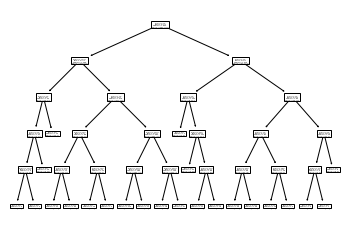

In [76]:
import numpy as np
import pandas as pd
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score


#Read the data into a variable
read_training_data = pd.read_csv("train.csv")



#Start with pre-processing

#drop the columns which will be not required for decision tree.
read_training_data = read_training_data.drop(columns=['Embarked','Cabin','Fare','Ticket'])

#converted the gender column from male/female to 0/1
read_training_data['Sex'] = read_training_data.Sex.map({'male':0,'female':1})

#Interpolate the data for age. Since dropping
read_training_data["Age"] = read_training_data["Age"].interpolate()

print(read_training_data)

#check whether there are any more of null or blank data.
columnnames = read_training_data.columns
for col in columnnames:
    print(col +' - '+ str(read_training_data[col].isnull().sum()))




#set the output column
y = read_training_data["Survived"]

#set the features for training
features = ["Age", "Sex", "SibSp", "Parch","Pclass"]

X = pd.get_dummies(read_training_data[features])




#split the data for training and test purposes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#classify the data and traing the tree using the decision tree algorithm.
model_tree = DecisionTreeClassifier("gini","best",5)
model_tree.fit(X_train,y_train)
#accuracy_score(y)

#plot the tree
tree.plot_tree(model_tree)

#calculate the cross validation score of the tree.
score_DecisionTree = cross_val_score(model_tree, X, y, cv=5, scoring='f1_macro')
print(sum(score_DecisionTree)/len(score_DecisionTree))

# for downloading the tree structure.
from sklearn.tree import export_graphviz
export_graphviz(model_tree,'Dtree.dot',feature_names = list(X.columns))
! dot -Tpng Dtree.dot -o Dtree.png


#start with training and fiting the random forest classifier 
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)
model.fit(X, y)

#calculate the cross validation score for random forest
score_randomForest = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

print(sum(score_randomForest)/len(score_randomForest))






